In [1]:
# ELO Merchant Category Recommendation - Exploratory Data Analysis (Test.csv)

In [2]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from IPython.display import display

# Set the visualization style
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

# Define data path - adjust as needed
DATA_PATH = '../data/raw/'  # Add your path here if needed


In [3]:
# Cell 2: Load Test Data
print("\n=== Loading Training Data ===")
test = pd.read_csv(DATA_PATH + 'test.csv')
print(f"Train set shape: {test.shape}")


=== Loading Training Data ===
Train set shape: (123623, 5)


In [4]:
# Cell 3: Basic Testing Data Overview
print("\n=== Testing Data Overview ===")
print(test.head())
print("\nColumn information:")
print(test.info())



=== Testing Data Overview ===
  first_active_month          card_id  feature_1  feature_2  feature_3
0            2017-04  C_ID_0ab67a22ab          3          3          1
1            2017-01  C_ID_130fd0cbdd          2          3          0
2            2017-08  C_ID_b709037bc5          5          1          1
3            2017-12  C_ID_d27d835a9f          2          1          0
4            2015-12  C_ID_2b5e3df5c2          5          1          1

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB
None


In [5]:
# Cell 4: Statistical Summary
print("\nStatistical summary:")
print(test.describe())


Statistical summary:
          feature_1      feature_2      feature_3
count  123623.00000  123623.000000  123623.000000
mean        3.10926       1.741796       0.564377
std         1.18911       0.749195       0.495840
min         1.00000       1.000000       0.000000
25%         2.00000       1.000000       0.000000
50%         3.00000       2.000000       1.000000
75%         4.00000       2.000000       1.000000
max         5.00000       3.000000       1.000000


In [14]:
# Cell 5: Simple Missing Values Analysis
print("\nMissing values in test data:")
missing_values = test.isnull().sum()
missing_percentages = (missing_values / len(test) * 100).round(2)

# Create a DataFrame with both counts and percentages
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})

# Only display columns that actually have missing values
missing_cols = missing_data[missing_data['Missing Values'] > 0]

if missing_cols.empty:
    print("No missing values found in any column.")
else:
    print(missing_cols)
    
    # Simple summary
    total_missing = missing_values.sum()
    print(f"\nTotal missing values: {total_missing}")


Missing values in test data:
                    Missing Values  Percentage (%)
first_active_month               1             0.0

Total missing values: 1


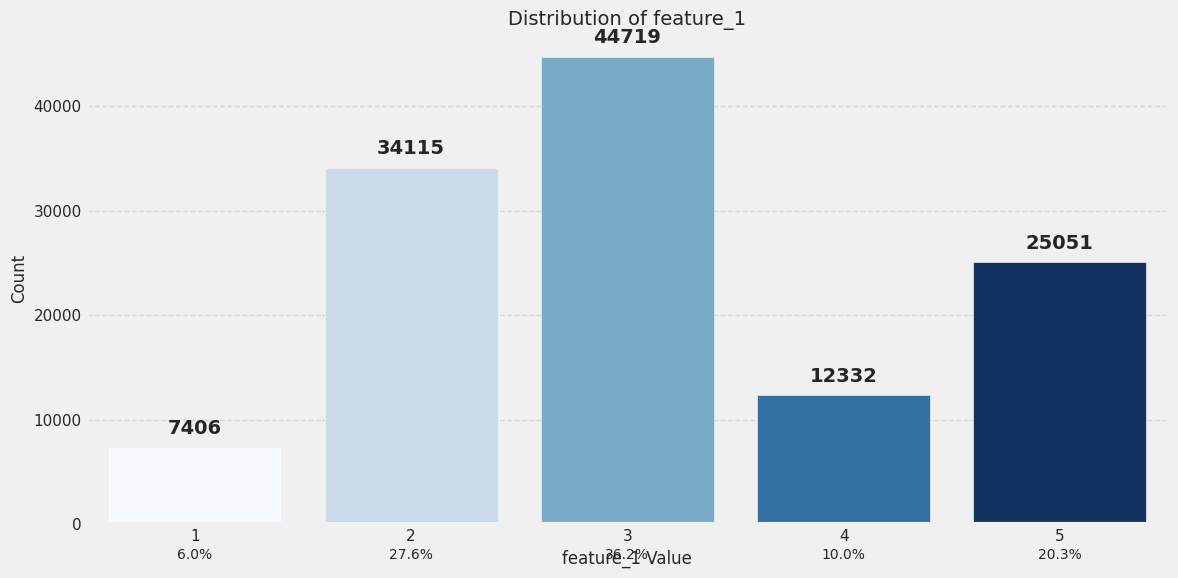

Feature 1 Statistics:
           Count  Percentage (%)
feature_1                       
1           7406            5.99
2          34115           27.60
3          44719           36.17
4          12332            9.98
5          25051           20.26




In [15]:
# Cell 6: Feature Distributions - Bar Charts

# Feature 1 Distribution
plt.figure(figsize=(12, 6))
feature1_counts = test['feature_1'].value_counts().sort_index()
plot_df1 = pd.DataFrame({'value': feature1_counts.index, 'count': feature1_counts.values})
ax1 = sns.barplot(x='value', y='count', hue='value', data=plot_df1, palette='Blues', legend=False)
plt.title('Distribution of feature_1', fontsize=14)
plt.xlabel('feature_1 Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, count in enumerate(feature1_counts.values):
    plt.text(i, count + (feature1_counts.max() * 0.02), f'{count}', 
             ha='center', va='bottom', fontweight='bold')
    
# Add percentage below x-axis labels
total = len(test)
for i, count in enumerate(feature1_counts.values):
    percentage = count / total * 100
    plt.text(i, -0.05 * feature1_counts.max(), f'{percentage:.1f}%', 
             ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics for feature_1
print("Feature 1 Statistics:")
feature1_stats = test['feature_1'].value_counts(normalize=True).sort_index() * 100
feature1_summary = pd.DataFrame({
    'Count': feature1_counts,
    'Percentage (%)': feature1_stats.round(2)
})
print(feature1_summary)
print("\n")


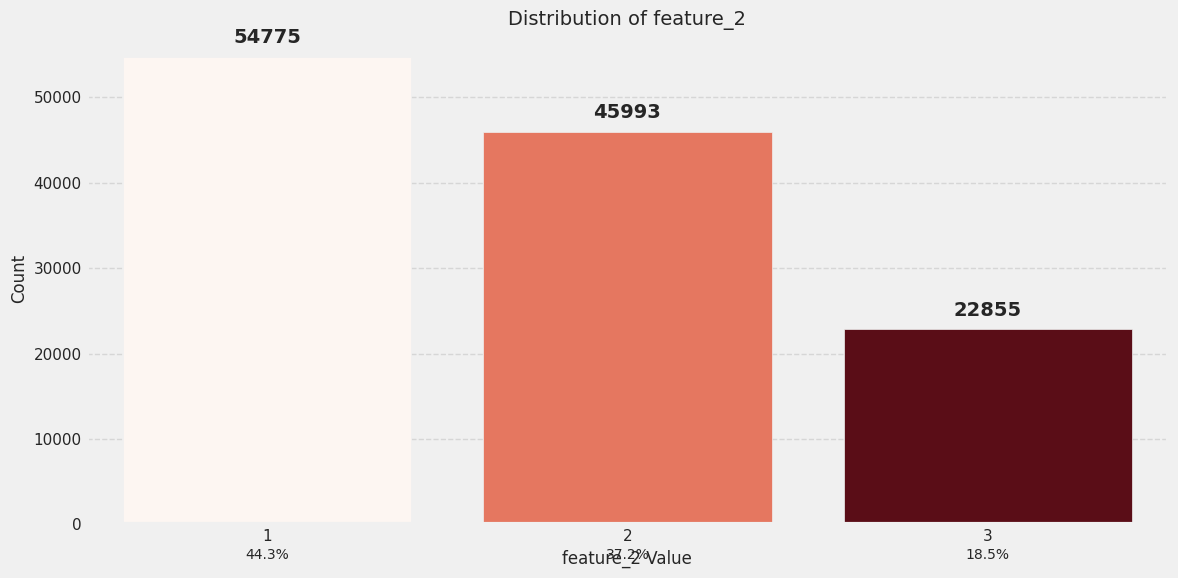

Feature 2 Statistics:
           Count  Percentage (%)
feature_2                       
1          54775           44.31
2          45993           37.20
3          22855           18.49




In [16]:
# Feature 2 Distribution
plt.figure(figsize=(12, 6))
feature2_counts = test['feature_2'].value_counts().sort_index()
plot_df2 = pd.DataFrame({'value': feature2_counts.index, 'count': feature2_counts.values})
ax2 = sns.barplot(x='value', y='count', hue='value', data=plot_df2, palette='Reds', legend=False)
plt.title('Distribution of feature_2', fontsize=14)
plt.xlabel('feature_2 Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, count in enumerate(feature2_counts.values):
    plt.text(i, count + (feature2_counts.max() * 0.02), f'{count}', 
             ha='center', va='bottom', fontweight='bold')
    
# Add percentage below x-axis labels
for i, count in enumerate(feature2_counts.values):
    percentage = count / total * 100
    plt.text(i, -0.05 * feature2_counts.max(), f'{percentage:.1f}%', 
             ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics for feature_2
print("Feature 2 Statistics:")
feature2_stats = test['feature_2'].value_counts(normalize=True).sort_index() * 100
feature2_summary = pd.DataFrame({
    'Count': feature2_counts,
    'Percentage (%)': feature2_stats.round(2)
})
print(feature2_summary)
print("\n")


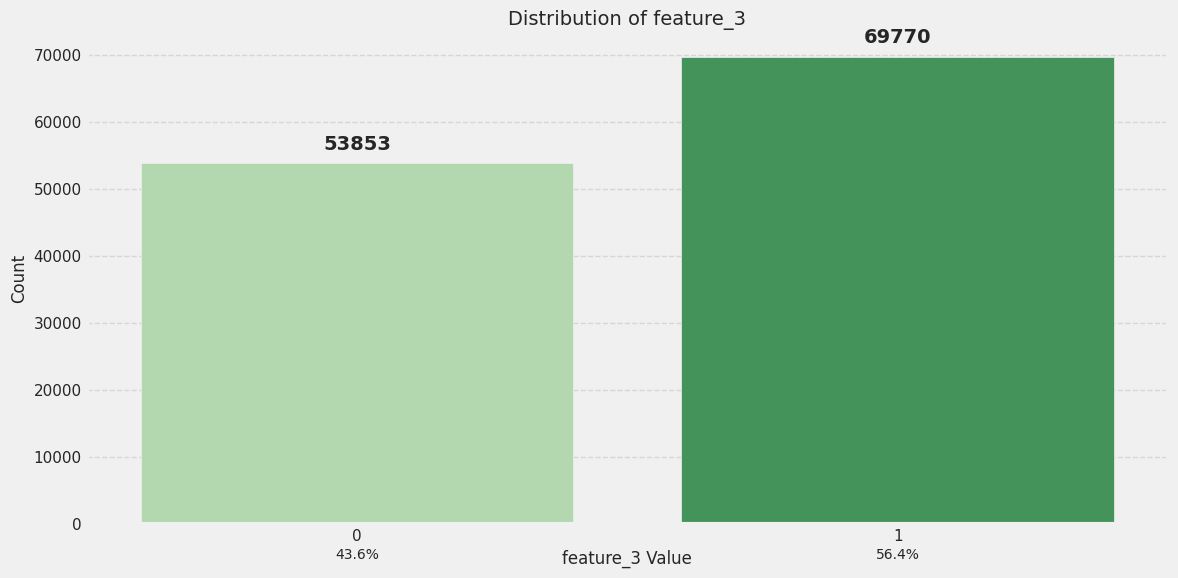

Feature 3 Statistics:
           Count  Percentage (%)
feature_3                       
0          53853           43.56
1          69770           56.44


In [17]:
# Feature 3 Distribution
plt.figure(figsize=(12, 6))
feature3_counts = test['feature_3'].value_counts().sort_index()
plot_df3 = pd.DataFrame({'value': feature3_counts.index, 'count': feature3_counts.values})
ax3 = sns.barplot(x='value', y='count', hue='value', data=plot_df3, palette='Greens', legend=False)
plt.title('Distribution of feature_3', fontsize=14)
plt.xlabel('feature_3 Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, count in enumerate(feature3_counts.values):
    plt.text(i, count + (feature3_counts.max() * 0.02), f'{count}', 
             ha='center', va='bottom', fontweight='bold')
    
# Add percentage below x-axis labels
for i, count in enumerate(feature3_counts.values):
    percentage = count / total * 100
    plt.text(i, -0.05 * feature3_counts.max(), f'{percentage:.1f}%', 
             ha='center', va='top', fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics for feature_3
print("Feature 3 Statistics:")
feature3_stats = test['feature_3'].value_counts(normalize=True).sort_index() * 100
feature3_summary = pd.DataFrame({
    'Count': feature3_counts,
    'Percentage (%)': feature3_stats.round(2)
})
print(feature3_summary)

Missing first_active_month values: 1 (0.00%)
Analysis will be performed on 123622 records (excluding missing values)

=== First Active Month Analysis (Test Dataset) ===


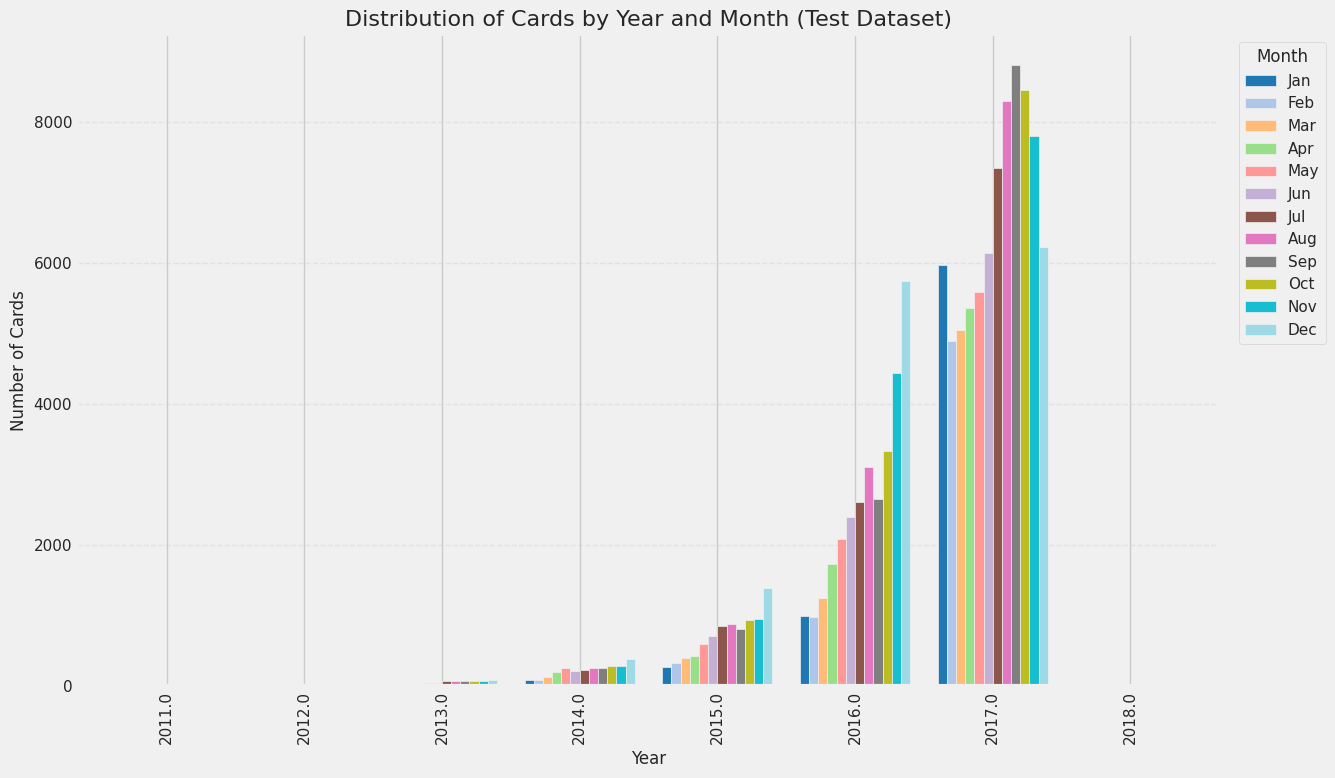


Card Distribution by Year and Month (Test Dataset):
         Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
year                                                                          
2011.0     0     0     0     0     0     0     0     0     0     0     3     2
2012.0     1     4    10    11    12    14    15    21    18    13    18    16
2013.0    14    28    34    40    44    56    72    73    75    80    80    95
2014.0    90    97   141   209   263   220   236   265   257   291   296   390
2015.0   279   335   397   433   604   711   862   882   818   936   955  1393
2016.0   996   987  1258  1740  2096  2407  2610  3108  2663  3335  4444  5751
2017.0  5974  4903  5058  5371  5598  6147  7344  8299  8805  8451  7807  6233
2018.0    28     0     0     0     0     0     0     0     0     0     0     0

Card Distribution by Year:
        Count  Percentage (%)
year                         
2011.0      5            0.00
2012.0    153            0.12
2013.0   

In [20]:
# Cell 7: First Active Month Analysis for Test Dataset (Without Warnings)
if 'first_active_month' in test.columns:
    # Report missing values
    missing_count = test['first_active_month'].isnull().sum()
    print(f"Missing first_active_month values: {missing_count} ({missing_count/len(test)*100:.2f}%)")
    
    # Create a deep copy of the test dataframe to avoid SettingWithCopyWarning
    test_clean = test.copy()
    
    # Remove rows with missing first_active_month values
    test_clean = test_clean.dropna(subset=['first_active_month'])
    print(f"Analysis will be performed on {len(test_clean)} records (excluding missing values)")
    
    # Convert to datetime using loc to avoid warnings
    test_clean.loc[:, 'first_active_month'] = pd.to_datetime(test_clean['first_active_month'])
    
    print("\n=== First Active Month Analysis (Test Dataset) ===")
    
    # Extract year and month using loc to avoid warnings
    test_clean.loc[:, 'year'] = test_clean['first_active_month'].dt.year
    test_clean.loc[:, 'month'] = test_clean['first_active_month'].dt.month
    
    # Create a pivot table to count cards by year and month
    year_month_counts = pd.crosstab(
        index=test_clean['year'],
        columns=test_clean['month']
    )
    
    # Rename columns to month names
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    year_month_counts.columns = [month_names[int(i)-1] for i in year_month_counts.columns]
    
    # Plot using pandas built-in plotting
    ax = year_month_counts.plot(
        kind='bar', 
        figsize=(16, 8),
        width=0.8,
        colormap='tab20'
    )
    
    # Enhance the plot
    plt.title('Distribution of Cards by Year and Month (Test Dataset)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Cards', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.legend(title="Month", bbox_to_anchor=(1.01, 1), loc='upper left')
    
    # Add some space on the right for the legend
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    plt.show()
    
    # Display the counts in table format
    print("\nCard Distribution by Year and Month (Test Dataset):")
    print(year_month_counts)
    
    # Calculate percentage distribution by year
    year_counts = test_clean['year'].value_counts().sort_index()
    year_percentage = (year_counts / year_counts.sum() * 100).round(2)
    
    print("\nCard Distribution by Year:")
    year_summary = pd.DataFrame({
        'Count': year_counts,
        'Percentage (%)': year_percentage
    })
    print(year_summary)
    
    # Calculate percentage distribution by month
    month_counts = test_clean['month'].value_counts().sort_index()
    month_percentage = (month_counts / month_counts.sum() * 100).round(2)
    
    print("\nCard Distribution by Month:")
    month_summary = pd.DataFrame({
        'Count': month_counts,
        'Percentage (%)': month_percentage,
        'Month Name': [month_names[int(i)-1] for i in month_counts.index]
    })
    print(month_summary)
else:
    print("first_active_month column not found in the test dataset.")